In [ ]:
import tensorflow as tf
import ydf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("TensorFlow v" + tf.__version__)
print("Y Decision Forests v" + ydf.__version__)

TensorFlow v2.19.0
Y Decision Forests v0.13.0


In [ ]:
dataset_df = pd.read_csv('train.csv')
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (8693, 14)


In [ ]:
dataset_df.head(5)
dataset_df.describe()
dataset_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


<Axes: xlabel='Transported'>

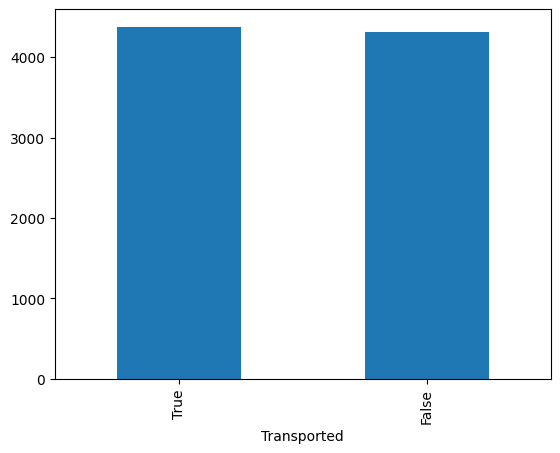

In [ ]:
plot_df = dataset_df.Transported.value_counts()
plot_df.plot(kind="bar")

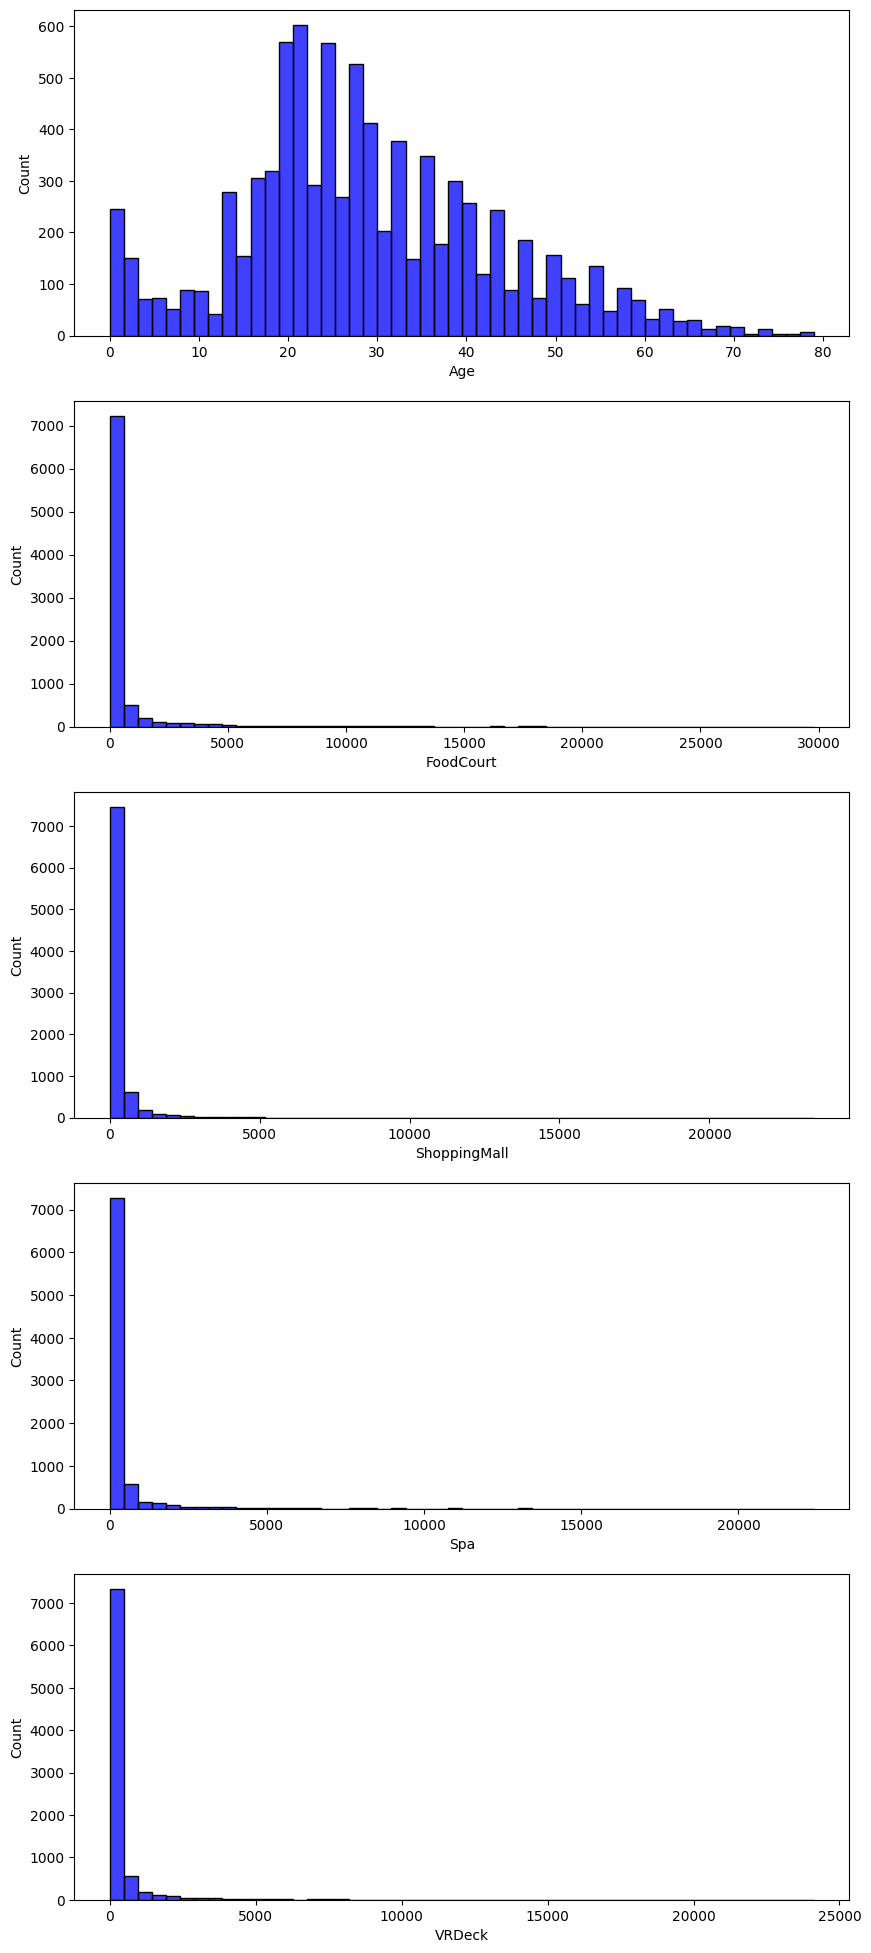

In [ ]:
fig, ax = plt.subplots(5,1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)

sns.histplot(dataset_df['Age'], color='b', bins=50, ax=ax[0]);
sns.histplot(dataset_df['FoodCourt'], color='b', bins=50, ax=ax[1]);
sns.histplot(dataset_df['ShoppingMall'], color='b', bins=50, ax=ax[2]);
sns.histplot(dataset_df['Spa'], color='b', bins=50, ax=ax[3]);
sns.histplot(dataset_df['VRDeck'], color='b', bins=50, ax=ax[4]);

In [ ]:
dataset_df = dataset_df.drop(['PassengerId', 'Name'], axis=1)
dataset_df.head(5)

dataset_df.isnull().sum().sort_values(ascending=False)

,0
CryoSleep,217
ShoppingMall,208
VIP,203
HomePlanet,201
Cabin,199
VRDeck,188
Spa,183
FoodCourt,183
Destination,182
RoomService,181


In [ ]:
dataset_df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = dataset_df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)
dataset_df.isnull().sum().sort_values(ascending=False)

,0
HomePlanet,201
Cabin,199
Destination,182
RoomService,181
Age,179
CryoSleep,0
VIP,0
FoodCourt,0
ShoppingMall,0
Spa,0


In [ ]:
label = "Transported"
dataset_df[label] = dataset_df[label].astype(int)

In [ ]:
dataset_df['VIP'] = dataset_df['VIP'].astype(int)
dataset_df['CryoSleep'] = dataset_df['CryoSleep'].astype(int)

In [ ]:
dataset_df[["Deck", "Cabin_num", "Side"]] = dataset_df["Cabin"].str.split("/", expand=True)


In [ ]:
try:
    dataset_df = dataset_df.drop('Cabin', axis=1)
except KeyError:
    print("Field does not exist")

In [ ]:
dataset_df.head(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S


In [ ]:
def split_dataset(dataset, test_ratio=0.20):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(dataset_df)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

6972 examples in training, 1721 examples in testing.


In [ ]:
!pip install ydf


In [ ]:
import ydf
import matplotlib.pyplot as plt

label = "Transported"  # target column

# Define the 3 learners
models = {
    "RandomForest": ydf.RandomForestLearner(label=label),
    "GradientBoostedTrees": ydf.GradientBoostedTreesLearner(label=label),
    "CART": ydf.CartLearner(label=label),
}

trained_models = {}

for name, learner in models.items():
    print(f"\n🔹 Training {name}...")
    model = learner.train(train_ds_pd)
    trained_models[name] = model

    # Validation evaluation
    print(f"\n📊 {name} - Validation Metrics:")
    eval_valid = model.evaluate(valid_ds_pd)
    print(eval_valid)



🔹 Training RandomForest...
Train model on 6972 examples
Model trained in 0:02:14.244644

📊 RandomForest - Validation Metrics:
accuracy: 0.803603
confusion matrix:
    label (row) \ prediction (col)
    +-----+-----+-----+
    |     |   0 |   1 |
    +-----+-----+-----+
    |   0 | 677 | 170 |
    +-----+-----+-----+
    |   1 | 168 | 706 |
    +-----+-----+-----+
characteristics:
    name: '1' vs others
    ROC AUC: 0.891005
    PR AUC: 0.900891
    Num thresholds: 292
loss: 0.419348
num examples: 1721
num examples (weighted): 1721


🔹 Training GradientBoostedTrees...
Train model on 6972 examples
Model trained in 0:00:48.659665

📊 GradientBoostedTrees - Validation Metrics:
accuracy: 0.800697
confusion matrix:
    label (row) \ prediction (col)
    +-----+-----+-----+
    |     |   0 |   1 |
    +-----+-----+-----+
    |   0 | 656 | 191 |
    +-----+-----+-----+
    |   1 | 152 | 722 |
    +-----+-----+-----+
characteristics:
    name: '1' vs others
    ROC AUC: 0.892483
    PR AUC: 0.

In [ ]:
for name, model in trained_models.items():
    print(f"\n🔥 {name} Variable Importances (NUM_AS_ROOT):")
    if "NUM_AS_ROOT" in model.variable_importances():
        print(model.variable_importances()["NUM_AS_ROOT"][:10])  # top 10 features
    else:
        print("NUM_AS_ROOT not available for this learner")



🔥 RandomForest Variable Importances (NUM_AS_ROOT):
[(105.0, 'CryoSleep'), (62.0, 'Spa'), (57.0, 'RoomService'), (49.0, 'VRDeck'), (12.0, 'ShoppingMall'), (10.0, 'FoodCourt'), (3.0, 'HomePlanet'), (2.0, 'Deck')]

🔥 GradientBoostedTrees Variable Importances (NUM_AS_ROOT):
[(21.0, 'CryoSleep'), (14.0, 'Spa'), (7.0, 'VRDeck'), (6.0, 'RoomService'), (6.0, 'Side'), (4.0, 'Cabin_num'), (2.0, 'Age'), (1.0, 'Destination'), (1.0, 'ShoppingMall')]

🔥 CART Variable Importances (NUM_AS_ROOT):
[(1.0, 'CryoSleep')]


In [ ]:
rf_model = trained_models["RandomForest"]
logs = rf_model.training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (OOB)")
plt.title("Random Forest OOB Accuracy")
plt.show()


AttributeError: 'TrainingLogEntry' object has no attribute 'num_trees'

In [ ]:
import pandas as pd

# Load test dataset
test_df = pd.read_csv('test.csv')
submission_id = test_df.PassengerId

# Fill missing values
test_df[['VIP', 'CryoSleep']] = test_df[['VIP', 'CryoSleep']].fillna(value=0)

# Feature engineering on Cabin
test_df[["Deck", "Cabin_num", "Side"]] = test_df["Cabin"].str.split("/", expand=True)
test_df = test_df.drop('Cabin', axis=1)

# Convert booleans to int
test_df['VIP'] = test_df['VIP'].astype(int)
test_df['CryoSleep'] = test_df['CryoSleep'].astype(int)

# Generate predictions for each model
submissions = {}
for name, model in trained_models.items():
    preds = model.predict(test_df).squeeze()
    preds_bool = (preds > 0.5).astype(bool)

    output = pd.DataFrame({
        "PassengerId": submission_id,
        "Transported": preds_bool
    })
    submissions[name] = output
    output.to_csv(f"{name}_submission.csv", index=False)
    print(f"✅ Saved {name}_submission.csv")

✅ Saved RandomForest_submission.csv
✅ Saved GradientBoostedTrees_submission.csv
✅ Saved CART_submission.csv


In [ ]:
print("\n📌 Final Comparison (Validation Accuracies):")
for name, model in trained_models.items():
    eval_valid = model.evaluate(valid_ds_pd)
    print(f"{name} Accuracy: {eval_valid.accuracy:.4f}")


📌 Final Comparison (Validation Accuracies):
RandomForest Accuracy: 0.8036
GradientBoostedTrees Accuracy: 0.8007
CART Accuracy: 0.8053
